In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateType, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR_LINUX, BASE_SCENARIO_NAME, TEMPLATE_DIR_LINUX
from aoe2mapgenerator.common.constants.default_objects import GHOST_OBJECT_DISPLACEMENT, DEFAULT_EMPTY_OBJECT
from aoe2mapgenerator.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.units.placers.point_manager import PointManager
from aoe2mapgenerator.testing import awesome_function
from aoe2mapgenerator.map.map_object import MapObject
from aoe2mapgenerator.units.placers.point_selector import PointSelector
from aoe2mapgenerator.visualizer.visualizer import Visualizer
from aoe2mapgenerator.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.map.map_manager import MapManager
from aoe2mapgenerator.units.placers.placer_configs import *
from aoe2mapgenerator.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json

In [2]:
map_manager = MapManager(100)
# This setup is kinda ugly for the point
# point_selector = PointSelector(map_manager.get_map())

In [9]:
points = map_manager.point_selector.get_points_in_range(PointSelectorInRangeConfig(
    map_layer_type=MapLayerType.UNIT,
    object_type=DEFAULT_EMPTY_OBJECT,
    min_range=10, 
    max_range=20,
    points_to_be_in_range_of=[(50,50)]
))

In [10]:
map_manager.point_manager.add_points(points)

In [11]:
for point in points:

    map_manager.base_placer.place_single(
        map_manager.point_manager,
        map_layer_type=MapLayerType.UNIT,
        point=point,
        obj_type=UnitInfo.AMAZON_ARCHER,
        player_id=PlayerId.ONE
    )

In [13]:
# map_manager.place_borders(AddBordersConfig(
#     point_manager=map_manager.point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     obj_type=UnitInfo.LEGIONARY,
#     player_id=PlayerId.ONE,
#     margin=1
# ))

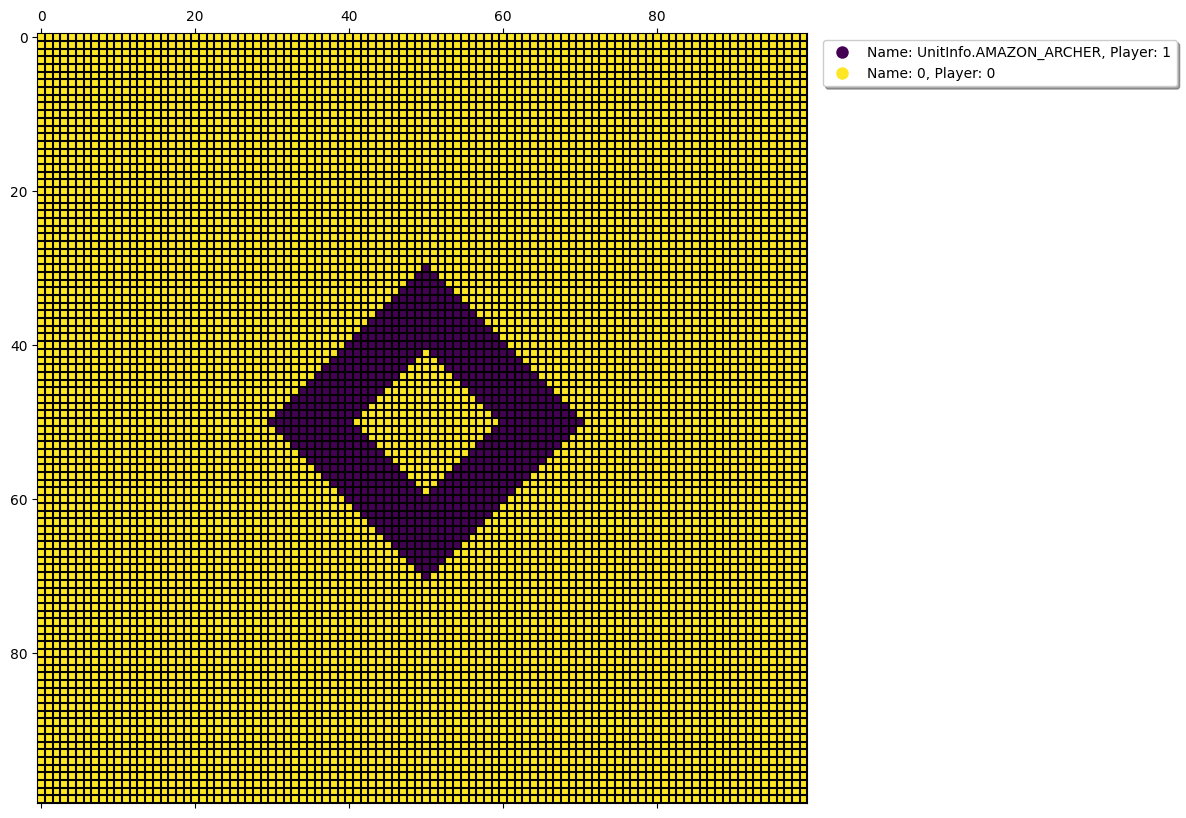

In [14]:
map_manager.visualize_map(VisualizeMapConfig(
    map_layer_type=MapLayerType.UNIT,fig_size=(10,10)
))